# Импорт библиотек и анализ тренировочного датасета

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv(r'train.csv')
df_train

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [3]:
df_train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [4]:
df_train.duplicated().sum()

0

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [6]:
df_train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


# Просмотр распределений каждого параметра и проверка выбросов

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>],
       [<Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>],
       [<Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'rainfall'}>]], dtype=object)

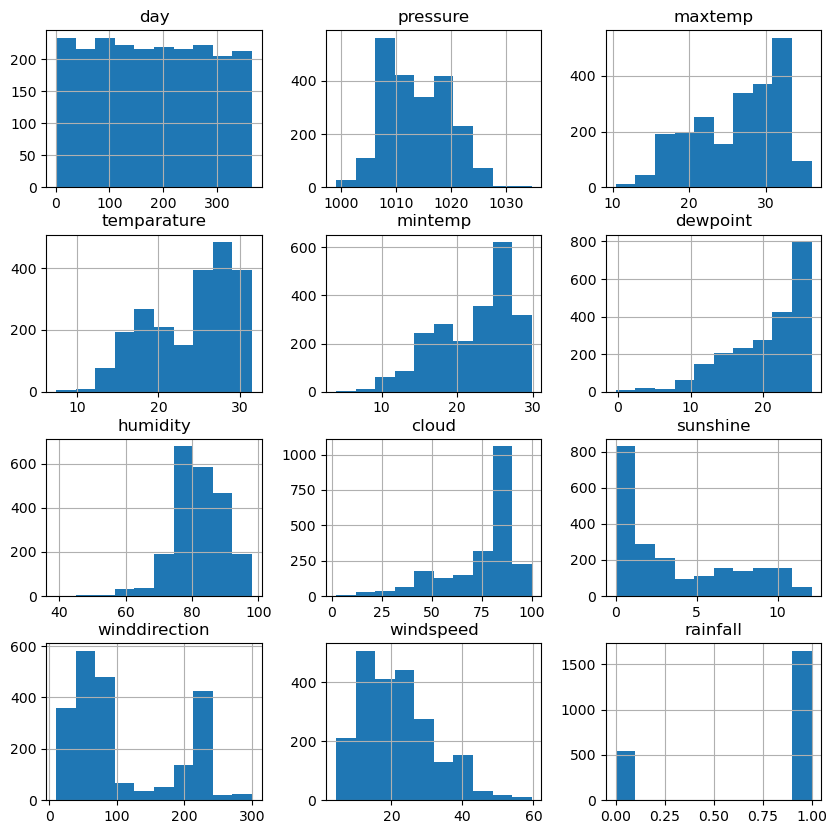

In [18]:
df_train.hist(figsize=(10, 10))

<Axes: >

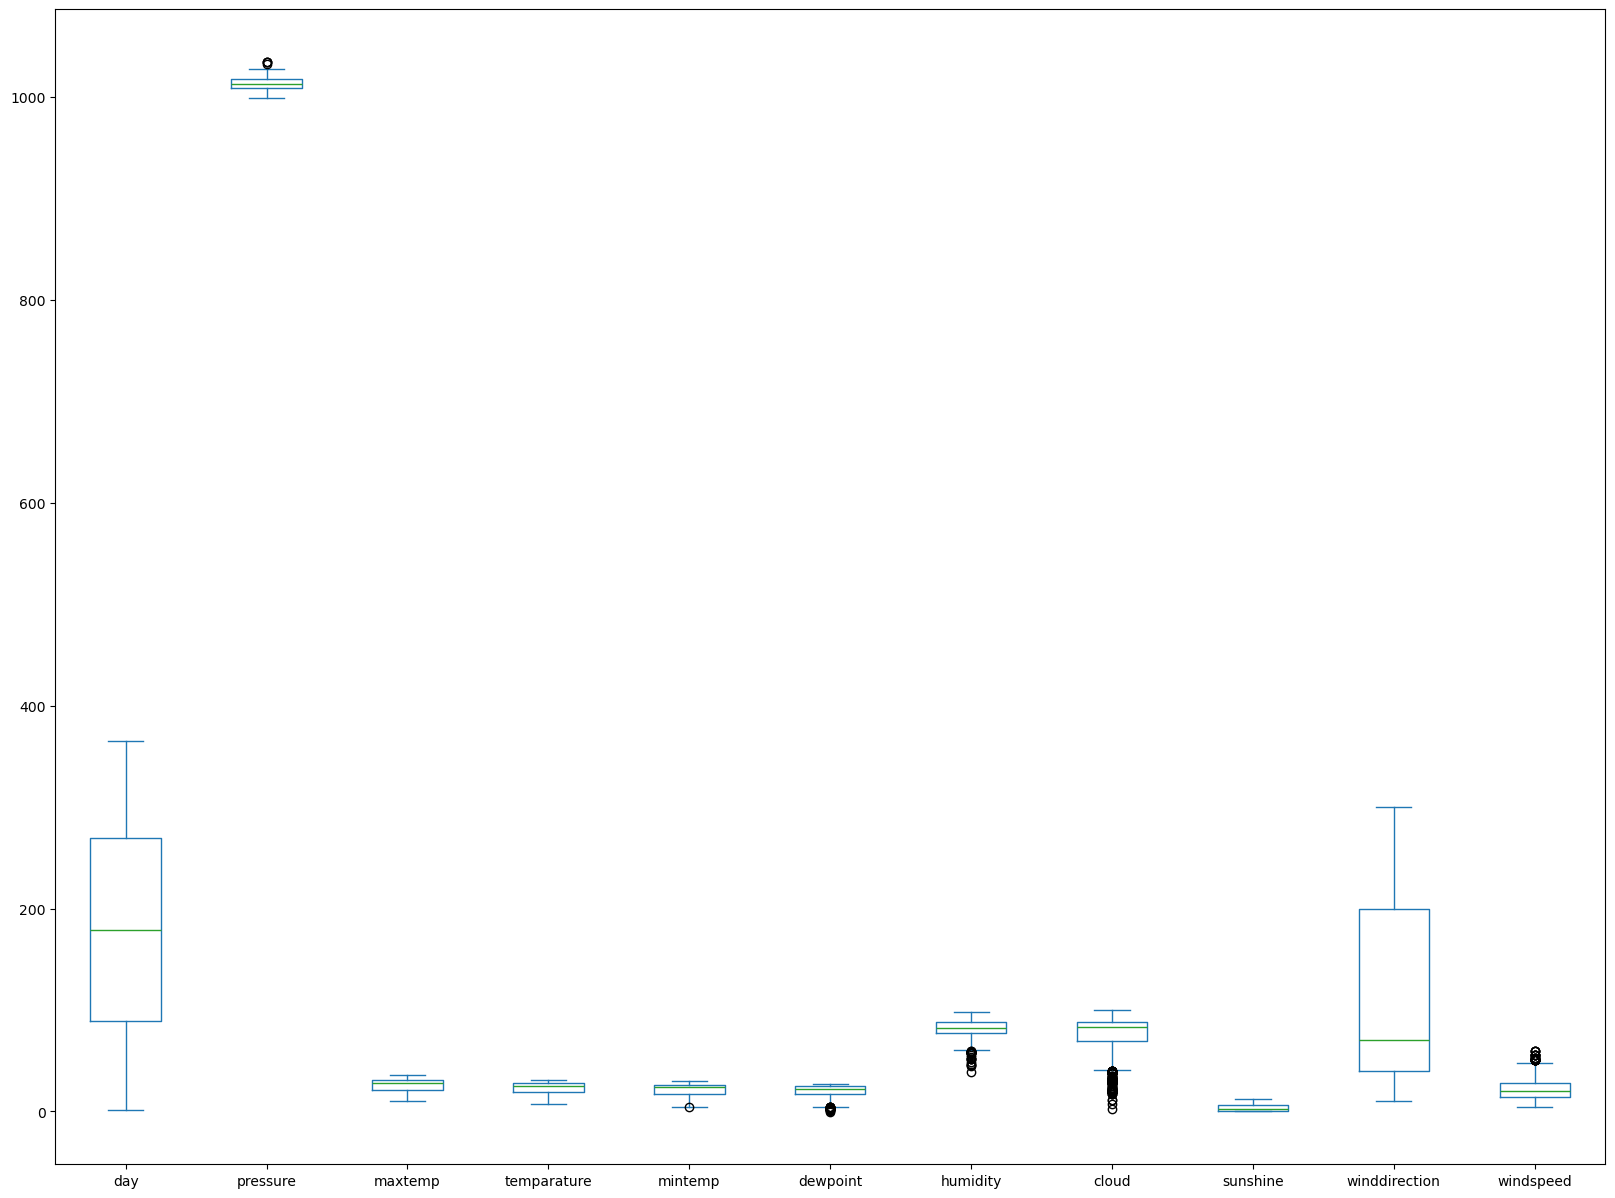

In [19]:

df_train[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]].plot.box(figsize=(20, 15))

In [11]:
df_train_id = df_train['id']
df_train = df_train.drop(columns=["id"])


# Загрузка тестовых данных 

In [12]:
df_test = pd.read_csv('test.csv')
df_test_id = df_test['id']

In [13]:
df_test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [14]:
df_test['winddirection'].fillna(df_test['winddirection'].mean(), inplace=True)

C:\Users\rigan\AppData\Local\Temp\ipykernel_27580\2790211327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['winddirection'].fillna(df_test['winddirection'].mean(), inplace=True)


In [15]:
df_test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [16]:
X_train = df_train[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]]
y_test = df_train['rainfall']

In [17]:
from sklearn.preprocessing import StandardScaler


# Масштабируем только столбец pressure
scaler = StandardScaler()
X_train['pressure'] = scaler.fit_transform(X_train[['pressure']])
X_train

C:\Users\rigan\AppData\Local\Temp\ipykernel_27580\49106372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['pressure'] = scaler.fit_transform(X_train[['pressure']])


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,0.671702,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,2,1.043116,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,3,1.856688,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,4,-0.035752,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,5,1.449902,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...,...
2185,361,0.176484,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,362,-0.212616,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,363,-0.053439,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,364,1.538334,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


Заполнили пропуски у тренировочного датасета и стандартизировали колонку pressure. Датасеты готовы для построения моделей

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=23)

# Создание модели дерева решений
dt = DecisionTreeClassifier(random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Поиск на кросс-валидации (5 фолдов)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Предсказание на тестовых данных
prediction_tree = grid_search.best_estimator_.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, prediction_tree)
print("Точность на тестовых данных:", accuracy)


Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшая точность на кросс-валидации: 0.8555962555962555
Точность на тестовых данных: 0.865296803652968


C:\Users\rigan\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [21]:
test_predict = grid_search.predict_proba(df_test[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]])
test_predict

array([[0.02424242, 0.97575758],
       [0.02424242, 0.97575758],
       [0.15873016, 0.84126984],
       ...,
       [0.02424242, 0.97575758],
       [0.02424242, 0.97575758],
       [0.02424242, 0.97575758]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=23)

# Создание модели случайного леса
rf = RandomForestClassifier(random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100],  # Количество деревьев в лесу
    'criterion': ['gini', 'entropy'],  # Критерий разбиения
    'max_depth': [3, 5, 10, None],  # Глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разбиения
    'min_samples_leaf': [1, 2, 5, 10],  # Минимальное количество выборок в листе
    'max_features': [None, 'sqrt', 'log2']  # Количество признаков для разбиения
}

# Поиск на кросс-валидации (5 фолдов)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Предсказание на тестовых данных
prediction_rf = grid_search.best_estimator_.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, prediction_rf)
print("Точность на тестовых данных:", accuracy)


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
Лучшая точность на кросс-валидации: 0.8665353329944079
Точность на тестовых данных: 0.8803418803418803


In [23]:
test_predict = grid_search.predict_proba(df_test[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]])
test_predict

array([[0.11381383, 0.88618617],
       [0.127062  , 0.872938  ],
       [0.17444594, 0.82555406],
       ...,
       [0.07112313, 0.92887687],
       [0.07804504, 0.92195496],
       [0.177413  , 0.822587  ]])

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=23)

# Создание модели Bagging
bagging = BaggingClassifier(random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'estimator': [DecisionTreeClassifier(random_state=42)],  # Используем DecisionTree как базовый классификатор
    'n_estimators': [50, 100, 200],  # Количество базовых классификаторов
    'estimator__criterion': ['gini', 'entropy'],  # Критерий разбиения в деревьях
    'estimator__max_depth': [3, 5, 10, None],  # Глубина деревьев
    'estimator__min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разбиения
    'estimator__min_samples_leaf': [1, 2, 5, 10],  # Минимальное количество выборок в листе
    'max_samples': [0.8, 0.9, 1.0],  # Доля случайных подвыборок из обучающего набора
    'max_features': [0.8, 0.9, 1.0],  # Доля случайных признаков для обучения каждого классификатора
    'bootstrap': [True, False]  # Использовать ли бутстрэп (случайную выборку с возвращением)
}

# Поиск на кросс-валидации (5 фолдов)
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Предсказание на тестовых данных
prediction_bagging = grid_search.best_estimator_.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, prediction_bagging)
print("Точность на тестовых данных:", accuracy)


Лучшие параметры: {'bootstrap': True, 'estimator': DecisionTreeClassifier(random_state=42), 'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 10, 'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 200}
Лучшая точность на кросс-валидации: 0.8723214285714287
Точность на тестовых данных: 0.8327402135231317


In [26]:
test_predict = grid_search.predict_proba(df_test[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]])
test_predict

array([[0.09596249, 0.90403751],
       [0.09596249, 0.90403751],
       [0.10946716, 0.89053284],
       ...,
       [0.10221009, 0.89778991],
       [0.10288207, 0.89711793],
       [0.1239414 , 0.8760586 ]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=23)

# Создание модели Логистической регрессии
logreg = LogisticRegression(random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'C': [0.1, 1, 10],  # Параметр регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200],  # Число итераций
    'penalty': ['l2'],  # Тип регуляризации
}

# Поиск на кросс-валидации (5 фолдов)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Лучшая точность на кросс-валидации: 0.8694040968342645


In [28]:
test_predict = grid_search.predict_proba(df_test[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]])
test_predict

array([[1.00000000e+000, 1.36920908e-207],
       [1.00000000e+000, 4.37325323e-207],
       [1.00000000e+000, 1.38164029e-208],
       ...,
       [1.00000000e+000, 1.08715518e-208],
       [1.00000000e+000, 6.82079648e-207],
       [1.00000000e+000, 5.55280004e-209]])

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=23)

# Создание модели SVM
svm = SVC(probability=True, random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'C': [0.1, 1, 10],  # Параметр регуляризации
    'kernel': ['linear', 'rbf'],  # Ядра: линейное и радиально-базисное
    'gamma': ['scale', 'auto'],  # Параметр ядра для 'rbf'
    'degree': [3, 4, 5],  # Степень для полиномиального ядра (если используется)
}

# Поиск на кросс-валидации (5 фолдов)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Предсказание на тестовых данных
prediction_svm = grid_search.best_estimator_.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, prediction_svm)
print("Точность на тестовых данных:", accuracy)


Лучшие параметры: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Лучшая точность на кросс-валидации: 0.8714646464646465
Точность на тестовых данных: 0.8444444444444444


In [31]:
test_predict = grid_search.predict_proba(df_test[["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]])
test_predict

array([[0.96077737, 0.03922263],
       [0.97224701, 0.02775299],
       [0.9874    , 0.0126    ],
       ...,
       [0.98290407, 0.01709593],
       [0.9815716 , 0.0184284 ],
       [0.99511086, 0.00488914]])